<p style="color:#FFF; background:#951587; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left">ABARKAN Suhaïla</span>
<span style="width:49%; display:inline-block; text-align:right">CMI ISI</span>
<span style="font-size:48px; font-style:normal"><b>BDD3 de l'enquête Bourciez</b></span><br> 
<span style="width:49%; display:inline-block; text-align:left">06/06/2024 - 12/07/2024</span>
<span style="width:49%; display:inline-block; text-align:right">Stage M1</span></p>

---
<h2 style="padding:16px; color:#FFF; background:#951587">Imports nécessaires</h2>

In [189]:
import Levenshtein as lv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import unidecode

from collections import Counter
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.optimize import curve_fit
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d
from scipy.spatial.distance import squareform
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler

---
<h2 style="padding:16px; color:#FFF; background:#951587">Importation de la base de données</h2>

`Indication :` Ici, le fichier .csv se trouve dans le même dossier que ce fichier notebook .ipynb. Veuillez changer le chemin menant au fichier .csv, si besoin.

In [190]:
df = pd.read_csv('bd3_Bourciez.csv', sep=';')
df.head()

departament            canton              comuna         x          y  \
0     Gironde  Canton d'Audenge  Andernos-les-Bains -1.092518  44.747690   
1     Gironde  Canton d'Audenge                Arès -1.137993  44.767644   
2     Gironde  Canton d'Audenge         Audenge-bis -1.015499  44.694984   
3     Gironde  Canton d'Audenge             Audenge -1.019857  44.688365   
4     Gironde  Canton d'Audenge             Biganos -0.969627  44.644091   

                          T31 T31 que enonciatiu (m) T31 que enonciatiu  \
0   alors estet hort malherus                  ø         part. enonc.     
1   alors estut hort malhurus                  ø         part. enonc.     
2   alors ēstét hort maleurus                  ø         part. enonc.     
3  alors êstut hort malheurus                  ø         part. enonc.     
4  labéts estét hort malherus                  ø         part. enonc.     

  illa hōra (m) illa hōra  ...  bājulābat      (m) bājulābat   dōnābat  \
0     alors          adv.  ...   bailléou  v. 3ps. imp. ind.       NaN   
1     alors          adv.  ...        NaN  v. 3ps. imp. ind.  dounaiou   
2     alors          adv.  ...  bailléoun  v. 3ps. imp. ind.       NaN   
3     alors          adv.  ...  bailléoue  v. 3ps. imp. ind.       NaN   
4       NaN          adv.  ...  bailléoue  v. 3ps. imp. ind.       NaN   

         (m) dōnābat dăre           (m) dăre  pas (m) pas res.1   (m) res.1  
0  v. 3ps. imp. ind.  NaN  v. 3ps. imp. ind.  NaN   part.  arrè  pron. ind.  
1  v. 3ps. imp. ind.  NaN  v. 3ps. imp. ind.  NaN   part.   rei  pron. ind.  
2  v. 3ps. imp. ind.  NaN  v. 3ps. imp. ind.  NaN   part.  arré  pron. ind.  
3  v. 3ps. imp. ind.  NaN  v. 3ps. imp. ind.  NaN   part.  arré  pron. ind.  
4  v. 3ps. imp. ind.  NaN  v. 3ps. imp. ind.  pas   part.    ré  pron. ind.  

[5 rows x 169 columns]

---
<h2 style="padding:16px; color:#FFF; background:#951587">Analyse des types d'opérations sur des mots choisis : insertion, suppression, substitution</h2>

In [191]:
def create_contingency_table(df):
    """Création d'une table de contingence montrant les opérations entre paires de mots."""
    insertion_operations = Counter()
    suppression_operations = Counter()
    substitution_operations = Counter()
    
    for i in range(len(df) - 1):
        mot1, mot2 = df[i], df[i+1]
        operations = lv.editops(mot1, mot2)
        for op in operations:
            if op[0] == 'insert':
                insertion_operations[mot2[op[2]]] += 1
            elif op[0] == 'delete':
                suppression_operations[mot1[op[1]]] += 1
            elif op[0] == 'replace':
                substitution_operations[(mot1[op[1]], mot2[op[2]])] += 1

    return insertion_operations, suppression_operations, substitution_operations


def most_common_operations(operation_count, operation_type, N=5):
    """Affichage des N opérations les plus fréquentes pour un type d'opération donné."""
    most_common = operation_count.most_common(N)
    if most_common:
        print(f"\nLes {operation_type}s les plus fréquentes :")
        for i, (operation, count) in enumerate(most_common):
            print(f"{i+1}. {operation}: {count}")
    else:
        print(f"\nAucune {operation_type} trouvée.")

<h4 style="padding:16px; color:#FFF; background:#C180BA">Choix du mot : "malheureux"</h4>

In [192]:
malheureux_MOT = df['malum hōra'].dropna().values
malheureux_MOT

array(['malherus', 'malhurus', 'maleurus', ..., 'malérous', 'malurous',
       'malérous'], dtype=object)

In [193]:
insertion_malheureux, suppression_malheureux, substitution_malheureux = create_contingency_table(malheureux_MOT)

most_common_operations(insertion_malheureux, "insertion")
most_common_operations(suppression_malheureux, "suppression")
most_common_operations(substitution_malheureux, "substitution")


Les insertions les plus fréquentes :
1. h: 767
2. x: 93
3. s: 66
4. o: 33
5. u: 29

Les suppressions les plus fréquentes :
1. h: 523
2. u: 186
3. x: 109
4. s: 62
5. é: 59

Les substitutions les plus fréquentes :
1. ('é', 'u'): 276
2. ('u', 'é'): 211
3. ('h', 'é'): 131
4. ('a', 'o'): 88
5. ('o', 'a'): 87


In [194]:
total_malheureux = len(insertion_malheureux) + len(suppression_malheureux) + len(substitution_malheureux)

insertions_malheureux = len(insertion_malheureux) / total_malheureux
suppressions_malheureux = len(suppression_malheureux) / total_malheureux
substitutions_malheureux = len(substitution_malheureux) / total_malheureux

print(f"Fréquence des types d'opérations sur le mot 'malheureux' :")
print(f"Insertions : {insertions_malheureux:.2%}")
print(f"Suppressions : {suppressions_malheureux:.2%}")
print(f"Substitutions : {substitutions_malheureux:.2%}")

Fréquence des types d'opérations sur le mot 'malheureux' :
Insertions : 13.91%
Suppressions : 14.57%
Substitutions : 71.52%


<h4 style="padding:16px; color:#FFF; background:#C180BA">Choix du mot : "être"</h4>

In [195]:
etre_MOT = df['stetit'].dropna().values
etre_MOT

array(['estet', 'estut', 'ēstét', ..., 'estic', 'estec', 'estec'],
      dtype=object)

In [196]:
insertion_etre, suppression_etre, substitution_etre = create_contingency_table(etre_MOT)

most_common_operations(insertion_etre, "insertion")
most_common_operations(suppression_etre, "suppression")
most_common_operations(substitution_etre, "substitution")


Les insertions les plus fréquentes :
1. o: 236
2. u: 175
3. q: 133
4. a: 33
5. b: 33

Les suppressions les plus fréquentes :
1. u: 399
2. q: 81
3. c: 42
4. é: 42
5. e: 33

Les substitutions les plus fréquentes :
1. ('e', 'é'): 351
2. ('é', 'e'): 344
3. ('o', 'è'): 115
4. ('é', 'u'): 107
5. ('è', 'u'): 101


In [197]:
total_etre = len(insertion_etre) + len(suppression_etre) + len(substitution_etre)

insertions_etre = len(insertion_etre) / total_etre
suppressions_etre = len(suppression_etre) / total_etre
substitutions_etre = len(substitution_etre) / total_etre

print(f"Fréquence des types d'opérations sur le mot 'être' :")
print(f"Insertions : {insertions_etre:.2%}")
print(f"Suppressions : {suppressions_etre:.2%}")
print(f"Substitutions : {substitutions_etre:.2%}")

Fréquence des types d'opérations sur le mot 'être' :
Insertions : 11.49%
Suppressions : 12.64%
Substitutions : 75.86%


---
<h2 style="padding:16px; color:#FFF; background:#951587">Calcul des plus proches voisins</h2>

In [198]:
points = df[['x', 'y']].dropna().values
points

array([[-1.0925184 , 44.7476897 ],
       [-1.1379928 , 44.767644  ],
       [-1.01549929, 44.69498399],
       ...,
       [ 1.72256455, 43.40377343],
       [ 1.7151072 , 43.4004663 ],
       [ 1.66193   , 43.4352    ]])

<h4 style="padding:16px; color:#FFF; background:#C180BA">Diagramme de Voronoï</h4>

<Figure size 1500x1500 with 0 Axes>

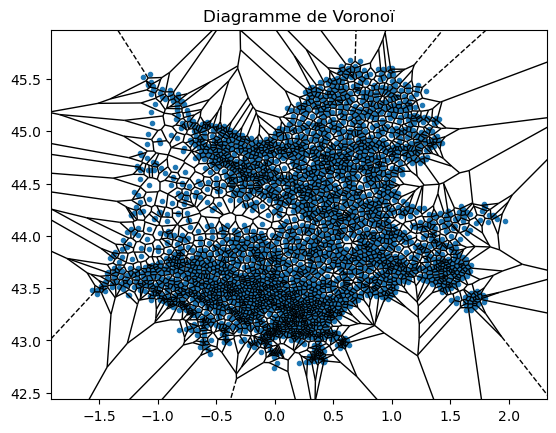

In [199]:
diagramme = Voronoi(points)
plt.figure(figsize=(15, 15))
voronoi_plot_2d(diagramme, show_vertices=False, line_width=1)
plt.title('Diagramme de Voronoï')
plt.show()

<h4 style="padding:16px; color:#FFF; background:#C180BA">Triangulation de Delaunay</h4>

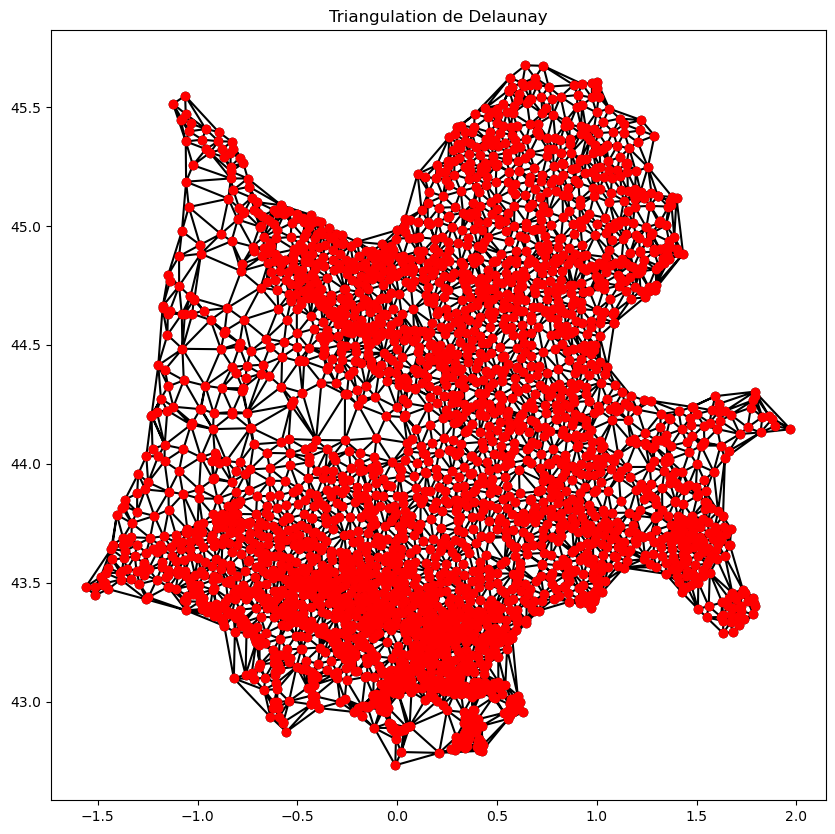

In [200]:
triangle = Delaunay(points)

new_triangle = []
for x in triangle.simplices: # on parcourt tous les triangles
    # on garde les triangles qui ont des cotes inférieurs à 0.25
    a, b, c = x
    dist_ab = np.linalg.norm(points[a] - points[b])
    dist_bc = np.linalg.norm(points[b] - points[c])
    dist_ca = np.linalg.norm(points[c] - points[a])
    if dist_ab <= 0.25 and dist_bc <= 0.25 and dist_ca <= 0.25: 
        new_triangle.append(x)

plt.figure(figsize=(10, 10))
plt.triplot(points[:, 0], points[:, 1], new_triangle, 'o-', color="black")
plt.plot(points[:, 0], points[:, 1], 'ro')
plt.title('Triangulation de Delaunay')
plt.show()

---
<h2 style="padding:16px; color:#FFF; background:#951587">Analyse des types d'opérations effectuées, en fonction des plus proches voisins</h2>

In [201]:
# légèrement différente de la précédente version, au niveau des paramètres notamment
def create_contingency_table(mot1, mot2):
    """Création d'une table de contingence montrant les opérations entre deux mots."""
    insertion_operations = Counter()
    suppression_operations = Counter()
    substitution_operations = Counter()
    
    operations = lv.editops(mot1, mot2)
    for op in operations:
        if op[0] == 'insert':
            insertion_operations[mot2[op[2]]] += 1
        elif op[0] == 'delete':
            suppression_operations[mot1[op[1]]] += 1
        elif op[0] == 'replace':
            substitution_operations[(mot1[op[1]], mot2[op[2]])] += 1

    return insertion_operations, suppression_operations, substitution_operations

<h4 style="padding:16px; color:#FFF; background:#C180BA">Plus proches voisins, pour le mot "malheureux"</h4>

**1ère version : visible sur vscode**

`Indication :` cliquez sur "scrollable element" pour avoir le détail sur tous les mots.

In [202]:
voisins = triangle.neighbors

for i, mot in enumerate(malheureux_MOT):
    print(f"\nMot : {mot}")
    for j in voisins[i]:
        if j != -1 and j < len(malheureux_MOT):
            voisin_mot = malheureux_MOT[j]
            ins_ops, sup_ops, sub_ops = create_contingency_table(mot, voisin_mot)
            print(f"\nVoisin : {voisin_mot}")
            print("Insertions :", dict(ins_ops))
            print("Suppressions :", dict(sup_ops))
            print("Substitutions :", dict(sub_ops))


Mot : malherus

Voisin : malhuroux
Insertions : {'o': 1}
Suppressions : {}
Substitutions : {('e', 'u'): 1, ('s', 'x'): 1}

Voisin : malhurous
Insertions : {'o': 1}
Suppressions : {}
Substitutions : {('e', 'u'): 1}

Voisin : maleurus
Insertions : {}
Suppressions : {}
Substitutions : {('h', 'e'): 1, ('e', 'u'): 1}

Mot : malhurus

Voisin : malhuroux
Insertions : {'o': 1}
Suppressions : {}
Substitutions : {('s', 'x'): 1}

Voisin : malurous
Insertions : {'o': 1}
Suppressions : {'h': 1}
Substitutions : {}

Voisin : malhurous
Insertions : {'o': 1}
Suppressions : {}
Substitutions : {}

Mot : maleurus

Voisin : malherus
Insertions : {'h': 1}
Suppressions : {'u': 1}
Substitutions : {}

Voisin : malurus
Insertions : {}
Suppressions : {'e': 1}
Substitutions : {}

Voisin : malheru
Insertions : {'h': 1}
Suppressions : {'u': 1, 's': 1}
Substitutions : {}

Mot : malheurus

Voisin : molurou
Insertions : {'o': 1}
Suppressions : {'h': 1, 'e': 1, 's': 1}
Substitutions : {('a', 'o'): 1}

Voisin : malhuro

**2ème version : visible sur un .csv**

`Indication :` Si le dossier "voisins" n'existe pas, n'oubliez pas de le créer (il doit figurer au même endroit que ce notebook).

In [203]:
rows = []
for i, mot in enumerate(malheureux_MOT):
    row = {
        'Mot': mot,
        'Commune': df.iloc[i]['comuna']
    }
    # parcourt les voisins du mot, dont il ne peut y avoir au maximum 3 voisins:
    voisins_mot = []
    for j in voisins[i]:
        if j != -1 and j < len(malheureux_MOT):
            voisin_mot = malheureux_MOT[j]
            ins_ops, sup_ops, sub_ops = create_contingency_table(mot, voisin_mot)
            voisins_mot.append({
                'Voisin': voisin_mot,
                'Commune': df.iloc[j]['comuna'],
                'Insertions': dict(ins_ops),
                'Suppressions': dict(sup_ops),
                'Substitutions': dict(sub_ops)
            })
    # pour que les voisins soient bien classés dans le csv
    for n in range(3):
        if n < len(voisins_mot):
            row[f'Voisin_{n+1}'] = voisins_mot[n]['Voisin']
            row[f'Commune_{n+1}'] = voisins_mot[n]['Commune']
            row[f'Insertions_{n+1}'] = voisins_mot[n]['Insertions']
            row[f'Suppressions_{n+1}'] = voisins_mot[n]['Suppressions']
            row[f'Substitutions_{n+1}'] = voisins_mot[n]['Substitutions']
        else:
            # renvoie vide si le voisin n'existe pas
            row[f'Voisin_{n+1}'] = None
            row[f'Commune_{n+1}'] = None
            row[f'Insertions_{n+1}'] = None
            row[f'Suppressions_{n+1}'] = None
            row[f'Substitutions_{n+1}'] = None
    rows.append(row)

df_malheureux = pd.DataFrame(rows)
df_malheureux.to_csv('voisins/malheureux_voisins.csv', index=False)

<h4 style="padding:16px; color:#FFF; background:#C180BA">Plus proches voisins, pour le mot "être"</h4>

**1ère version : visible sur vscode**

`Indication :` cliquez sur "scrollable element" pour avoir le détail sur tous les mots.

In [204]:
voisins = triangle.neighbors

for i, mot in enumerate(etre_MOT):
    print(f"\nMot : {mot}")
    for j in voisins[i]:
        if j != -1 and j < len(etre_MOT):
            voisin_mot = etre_MOT[j]
            ins_ops, sup_ops, sub_ops = create_contingency_table(mot, voisin_mot)
            print(f"\nVoisin : {voisin_mot}")
            print("Insertions :", dict(ins_ops))
            print("Suppressions :", dict(sup_ops))
            print("Substitutions :", dict(sub_ops))


Mot : estet

Voisin : estout
Insertions : {'o': 1}
Suppressions : {}
Substitutions : {('e', 'u'): 1}

Voisin : estout
Insertions : {'o': 1}
Suppressions : {}
Substitutions : {('e', 'u'): 1}

Voisin : ēstét
Insertions : {}
Suppressions : {}
Substitutions : {('e', 'ē'): 1, ('e', 'é'): 1}

Mot : estut

Voisin : éstoutt
Insertions : {'o': 1, 't': 1}
Suppressions : {}
Substitutions : {('e', 'é'): 1}

Voisin : éstèt
Insertions : {}
Suppressions : {}
Substitutions : {('e', 'é'): 1, ('u', 'è'): 1}

Voisin : estout
Insertions : {'o': 1}
Suppressions : {}
Substitutions : {}

Mot : ēstét

Voisin : estet
Insertions : {}
Suppressions : {}
Substitutions : {('ē', 'e'): 1, ('é', 'e'): 1}

Voisin : éstut
Insertions : {}
Suppressions : {}
Substitutions : {('ē', 'é'): 1, ('é', 'u'): 1}

Voisin : éstout
Insertions : {'o': 1}
Suppressions : {}
Substitutions : {('ē', 'é'): 1, ('é', 'u'): 1}

Mot : êstut

Voisin : quéstouc
Insertions : {'q': 1, 'u': 1, 'o': 1}
Suppressions : {}
Substitutions : {('ê', 'é'): 

**2ème version : visible sur un .csv**

`Indication :` Si le dossier "voisins" n'existe pas, n'oubliez pas de le créer (il doit figurer au même endroit que ce notebook).

In [205]:
rows = []
for i, mot in enumerate(etre_MOT):
    row = {
        'Mot': mot,
        'Commune': df.iloc[i]['comuna']
    }
    # parcourt les voisins du mot, dont il ne peut y avoir au maximum 3 voisins:
    voisins_mot = []
    for j in voisins[i]:
        if j != -1 and j < len(etre_MOT):
            voisin_mot = etre_MOT[j]
            ins_ops, sup_ops, sub_ops = create_contingency_table(mot, voisin_mot)
            voisins_mot.append({
                'Voisin': voisin_mot,
                'Commune': df.iloc[j]['comuna'],
                'Insertions': dict(ins_ops),
                'Suppressions': dict(sup_ops),
                'Substitutions': dict(sub_ops)
            })
    # pour que les voisins soient bien classés dans le csv
    for n in range(3):
        if n < len(voisins_mot):
            row[f'Voisin_{n+1}'] = voisins_mot[n]['Voisin']
            row[f'Commune_{n+1}'] = voisins_mot[n]['Commune']
            row[f'Insertions_{n+1}'] = voisins_mot[n]['Insertions']
            row[f'Suppressions_{n+1}'] = voisins_mot[n]['Suppressions']
            row[f'Substitutions_{n+1}'] = voisins_mot[n]['Substitutions']
        else:
            # renvoie vide si le voisin n'existe pas
            row[f'Voisin_{n+1}'] = None
            row[f'Commune_{n+1}'] = None
            row[f'Insertions_{n+1}'] = None
            row[f'Suppressions_{n+1}'] = None
            row[f'Substitutions_{n+1}'] = None
    rows.append(row)

df_malheureux = pd.DataFrame(rows)
df_malheureux.to_csv('voisins/etre_voisins.csv', index=False)

<h4 style="padding:16px; color:#FFF; background:#C180BA">Plus proches voisins pour tous les mots</h4>

In [206]:
# filtrer les colonnes sans les 5 premières et sans celles commençant par '(' ou par 'T'
colonnes_mots = [col for col in df.columns[5:] if not (col.startswith('(') or col.startswith('T'))]

In [207]:
for col in colonnes_mots:
    mots = df[col].dropna().astype(str).values
    rows = []
    for i, mot in enumerate(mots):
        row = {
            'Mot': mot,
            'Commune': df.iloc[i]['comuna']
        }
        # parcourt les voisins du mot, dont il ne peut y avoir au maximum 3 voisins:
        voisins_mot = []
        for j in voisins[i]:
            if j != -1 and j < len(mots):
                voisin_mot = mots[j]
                ins_ops, sup_ops, sub_ops = create_contingency_table(mot, voisin_mot)
                voisins_mot.append({
                    'Voisin': voisin_mot,
                    'Commune': df.iloc[j]['comuna'],
                    'Insertions': dict(ins_ops),
                    'Suppressions': dict(sup_ops),
                    'Substitutions': dict(sub_ops)
                })
        # pour que les voisins soient bien classés dans le csv
        for n in range(3):
            if n < len(voisins_mot):
                row[f'Voisin_{n+1}'] = voisins_mot[n]['Voisin']
                row[f'Commune_{n+1}'] = voisins_mot[n]['Commune']
                row[f'Insertions_{n+1}'] = voisins_mot[n]['Insertions']
                row[f'Suppressions_{n+1}'] = voisins_mot[n]['Suppressions']
                row[f'Substitutions_{n+1}'] = voisins_mot[n]['Substitutions']
            else:
                # renvoie vide si le voisin n'existe pas
                row[f'Voisin_{n+1}'] = None
                row[f'Commune_{n+1}'] = None
                row[f'Insertions_{n+1}'] = None
                row[f'Suppressions_{n+1}'] = None
                row[f'Substitutions_{n+1}'] = None
        rows.append(row)

    df_mot = pd.DataFrame(rows)
    df_mot.to_csv(f'voisins/{col}_voisins.csv', index=False)

---
<h2 style="padding:16px; color:#FFF; background:#951587">Matrices, corrélations, nuages de points, courbes d'ajustement<h2>

<h4 style="padding:16px; color:#FFF; background:#C180BA">Matrice des distances géographiques</h4>

`Indication :` La matrice des distances géographiques est sauvegardée sous "dist_geo.npy" pour éviter de relancer le chargement qui prend une quizaine de minutes.

`Indication (bis) :` Pour le bon déroulement du lancement de la prochaine cellule, si le dossier "matrices" n'existe pas, veuillez le créer (il doit figurer au même endroit que ce notebook).

In [208]:
'''from geopy.distance import geodesic
dist_geo = np.array([[geodesic((points[i][1], points[i][0]), (points[j][1], points[j][0])).km 
                      for j in range(len(points))] for i in range(len(points))])

with open('matrices/dist_geo.npy', 'wb') as f:
    np.save(f, dist_geo)'''

"from geopy.distance import geodesic\ndist_geo = np.array([[geodesic((points[i][1], points[i][0]), (points[j][1], points[j][0])).km \n                      for j in range(len(points))] for i in range(len(points))])\n\nwith open('matrices/dist_geo.npy', 'wb') as f:\n    np.save(f, dist_geo)"

In [209]:
dist_geo = np.load('matrices/dist_geo.npy')
print("Matrice de distances géographiques pour tous les mots :")
print(dist_geo)

Matrice de distances géographiques pour tous les mots :
[[  0.           4.22864247   8.45811407 ... 270.43478354 270.14562595
  264.410427  ]
 [  4.22864247   0.          12.6233903  ... 274.66293003 274.37360712
  268.63859762]
 [  8.45811407  12.6233903    0.         ... 262.14501102 261.85181107
  256.1214221 ]
 ...
 [270.43478354 274.66293003 262.14501102 ...   0.           0.70706134
    6.02520192]
 [270.14562595 274.37360712 261.85181107 ...   0.70706134   0.
    5.78259922]
 [264.410427   268.63859762 256.1214221  ...   6.02520192   5.78259922
    0.        ]]


<h4 style="padding:16px; color:#FFF; background:#C180BA">Matrice des distances linguistiques (selon Levenshtein) sur tous les mots, puis sur le mot "malheureux" et le mot "être"</h4>

**Tous les mots :**

`Indication :` La matrice des distances linguistiques sur tous les mots est sauvegardée sous "dist_lv.npy" pour éviter de relancer le chargement qui prend quelques minutes.

`Indication (bis) :` Pour le bon déroulement du lancement de la prochaine cellule, si le dossier "matrices" n'existe pas, veuillez le créer (il doit figurer au même endroit que ce notebook).

In [210]:
'''df = pd.read_csv('bd3_Bourciez.csv', sep=';')

# filtrer les colonnes sans les 5 premières et sans celles commençant par '(' ou par 'T'
colonnes_mots = [col for col in df.columns[5:] if not (col.startswith('(') or col.startswith('T'))]

# création des vecteurs de mots par ligne
vecteurs_mots = df[colonnes_mots].astype(str).values.tolist()

# fonction pour calculer la distance moyenne de Levenshtein des mots entre deux lignes
def distance_moyenne(ligne1, ligne2):
    distances = [lv.distance(m1, m2) for m1, m2 in zip(ligne1, ligne2)]
    return np.mean(distances)

# calcul de la matrice de distances de Levenshtein entre les lignes
n = len(vecteurs_mots)
dist_lv = np.zeros((n, n))
for i in range(n):
    for j in range(i, n):
        if i == j:
            dist_lv[i, j] = 0
        else:
            dist_lv[i, j] = distance_moyenne(vecteurs_mots[i], vecteurs_mots[j])
            dist_lv[j, i] = dist_lv[i, j]  # la matrice est symétrique

# sauvegarde de la matrice dans un .npy
with open('matrices/dist_lv.npy', 'wb') as f:
    np.save(f, dist_lv)'''

"df = pd.read_csv('bd3_Bourciez.csv', sep=';')\n\n# filtrer les colonnes sans les 5 premières et sans celles commençant par '(' ou par 'T'\ncolonnes_mots = [col for col in df.columns[5:] if not (col.startswith('(') or col.startswith('T'))]\n\n# création des vecteurs de mots par ligne\nvecteurs_mots = df[colonnes_mots].astype(str).values.tolist()\n\n# fonction pour calculer la distance moyenne de Levenshtein des mots entre deux lignes\ndef distance_moyenne(ligne1, ligne2):\n    distances = [lv.distance(m1, m2) for m1, m2 in zip(ligne1, ligne2)]\n    return np.mean(distances)\n\n# calcul de la matrice de distances de Levenshtein entre les lignes\nn = len(vecteurs_mots)\ndist_lv = np.zeros((n, n))\nfor i in range(n):\n    for j in range(i, n):\n        if i == j:\n            dist_lv[i, j] = 0\n        else:\n            dist_lv[i, j] = distance_moyenne(vecteurs_mots[i], vecteurs_mots[j])\n            dist_lv[j, i] = dist_lv[i, j]  # la matrice est symétrique\n\n# sauvegarde de la matrice

In [211]:
dist_lv = np.load('matrices/dist_lv.npy')
print("Matrice de distance de Levenshtein pour tous les mots :")
print(dist_lv)

Matrice de distance de Levenshtein pour tous les mots :
[[0.         0.77631579 0.76315789 ... 1.75       1.76315789 1.80263158]
 [0.77631579 0.         0.98684211 ... 1.84210526 1.69736842 1.77631579]
 [0.76315789 0.98684211 0.         ... 1.84210526 1.80263158 1.81578947]
 ...
 [1.75       1.84210526 1.84210526 ... 0.         0.76315789 0.47368421]
 [1.76315789 1.69736842 1.80263158 ... 0.76315789 0.         0.60526316]
 [1.80263158 1.77631579 1.81578947 ... 0.47368421 0.60526316 0.        ]]


**Mot "malheureux" :**

In [212]:
dist_lv_malheureux = np.array([[lv.distance(malheureux_MOT[i], malheureux_MOT[j]) 
                     for j in range(len(malheureux_MOT))] for i in range(len(malheureux_MOT))])
print("Matrice de distance de Levenshtein pour le mot 'malheureux' :")
print(dist_lv_malheureux)

Matrice de distance de Levenshtein pour le mot 'malheureux' :
[[0 1 2 ... 3 3 3]
 [1 0 1 ... 3 2 3]
 [2 1 0 ... 3 2 3]
 ...
 [3 3 3 ... 0 1 0]
 [3 2 2 ... 1 0 1]
 [3 3 3 ... 0 1 0]]


**Mot "être" :**

In [213]:
dist_lv_etre = np.array([[lv.distance(etre_MOT[i], etre_MOT[j]) 
                     for j in range(len(etre_MOT))] for i in range(len(etre_MOT))])
print("Matrice de distance de Levenshtein pour le mot 'être' :")
print(dist_lv_etre)

Matrice de distance de Levenshtein pour le mot 'être' :
[[0 1 2 ... 2 1 1]
 [1 0 2 ... 2 2 2]
 [2 2 0 ... 3 3 3]
 ...
 [2 2 3 ... 0 1 1]
 [1 2 3 ... 1 0 0]
 [1 2 3 ... 1 0 0]]


<h4 style="padding:16px; color:#FFF; background:#C180BA">Corrélation</h4>

In [214]:
print(f"Dimensions de dist_geo: {dist_geo.shape}")
print(f"Dimensions de dist_lv: {dist_lv.shape}")
print(f"Dimensions de dist_lv_malheureux: {dist_lv_malheureux.shape}")
print(f"Dimensions de dist_lv_etre: {dist_lv_etre.shape}")

Dimensions de dist_geo: (3392, 3392)
Dimensions de dist_lv: (3392, 3392)
Dimensions de dist_lv_malheureux: (3378, 3378)
Dimensions de dist_lv_etre: (2106, 2106)


Les dimensions de ces deux matrices étant différentes, on choisit de garder que les dimensions en commun pour ne pas avoir de problèmes pour les corrélations.

In [215]:
common_indices = np.arange(min(len(points), len(malheureux_MOT), len(etre_MOT)))

dist_geo_sub = dist_geo[np.ix_(common_indices, common_indices)]
dist_lv_sub = dist_lv[np.ix_(common_indices, common_indices)]
dist_lv_malheureux_sub = dist_lv_malheureux[np.ix_(common_indices, common_indices)]
dist_lv_etre_sub = dist_lv_etre[np.ix_(common_indices, common_indices)]

print(f"Dimensions de dist_geo_sub: {dist_geo_sub.shape}")
print(f"Dimensions de dist_lv_sub: {dist_lv_sub.shape}")
print(f"Dimensions de dist_lv_malheureux_sub: {dist_lv_malheureux_sub.shape}")
print(f"Dimensions de dist_lv_etre_sub: {dist_lv_etre_sub.shape}")

Dimensions de dist_geo_sub: (2106, 2106)
Dimensions de dist_lv_sub: (2106, 2106)
Dimensions de dist_lv_malheureux_sub: (2106, 2106)
Dimensions de dist_lv_etre_sub: (2106, 2106)


In [216]:
corr, _ = pearsonr(dist_geo.flatten(), dist_lv.flatten())
print(f"Corrélation entre la distance géographique et la distance de Levenshtein pour tous les mots : {corr:.2f}")

Corrélation entre la distance géographique et la distance de Levenshtein pour tous les mots : 0.75


In [217]:
corr, _ = pearsonr(dist_geo_sub.flatten(), dist_lv_malheureux_sub.flatten())
print(f"Corrélation entre la distance géographique et la distance de Levenshtein pour le mot 'malheureux' : {corr:.2f}")

Corrélation entre la distance géographique et la distance de Levenshtein pour le mot 'malheureux' : 0.20


In [218]:
corr, _ = pearsonr(dist_geo_sub.flatten(), dist_lv_etre_sub.flatten())
print(f"Corrélation entre la distance géographique et la distance de Levenshtein pour le mot 'etre' : {corr:.2f}")

Corrélation entre la distance géographique et la distance de Levenshtein pour le mot 'etre' : 0.15


In [219]:
corr, _ = pearsonr(dist_lv_sub.flatten(), dist_lv_malheureux_sub.flatten())
print(f"Corrélation entre la distance de Levenshtein pour tous les mots et pour le mot 'malheureux' : {corr:.2f}")

Corrélation entre la distance de Levenshtein pour tous les mots et pour le mot 'malheureux' : 0.26


In [220]:
corr, _ = pearsonr(dist_lv_sub.flatten(), dist_lv_etre_sub.flatten())
print(f"Corrélation entre la distance de Levenshtein pour tous les mots et pour le mot 'être' : {corr:.2f}")

Corrélation entre la distance de Levenshtein pour tous les mots et pour le mot 'être' : 0.16


In [221]:
corr, _ = pearsonr(dist_lv_malheureux_sub.flatten(), dist_lv_etre_sub.flatten())
print(f"Corrélation entre la distance de Levenshtein pour le mot 'malheureux' et pour le mot 'etre' : {corr:.2f}")

Corrélation entre la distance de Levenshtein pour le mot 'malheureux' et pour le mot 'etre' : 0.10


Maintenant que nous avons calculé ces coefficients de corrélations, nous remarquons que la **plus élevée** s'agit de la corrélation entre la **matrice de distances géographiques** et la **matrice de distances linguistiques** sur l'ensemble des mots, avec une valeur de `0.75`.

Nous allons alors étudié pour combien de mots selectionnés dans la **matrice de distances linguistiques** cette corrélation atteint environ 0.60.

In [275]:
'''import random

df = pd.read_csv('bd3_Bourciez.csv', sep=';')

# filtrer les colonnes sans les 5 premières et sans celles commençant par '(' ou par 'T'
colonnes_mots = [col for col in df.columns[5:] if not (col.startswith('(') or col.startswith('T'))]

# fonction pour calculer la distance moyenne de Levenshtein des mots entre deux lignes
def distance_moyenne(ligne1, ligne2):
    distances = [lv.distance(m1, m2) for m1, m2 in zip(ligne1, ligne2)]
    return np.mean(distances)

# fonction pour calculer la matrice de distances de Levenshtein pour un sous-ensemble de colonnes
def calculer_distances_levenshtein(df, colonnes):
    vecteurs_mots = df[colonnes].astype(str).values.tolist()
    n = len(vecteurs_mots)
    dist_lv = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            if i == j:
                dist_lv[i, j] = 0
            else:
                dist_lv[i, j] = distance_moyenne(vecteurs_mots[i], vecteurs_mots[j])
                dist_lv[j, i] = dist_lv[i, j]  # la matrice est symétrique
    return dist_lv

# calculer la corrélation pour des sous-ensembles croissants de mots
correlations = []
for k in range(1, len(colonnes_mots) + 1):
    subset_colonnes = random.sample(colonnes_mots, k)
    dist_lv_subset = calculer_distances_levenshtein(df, subset_colonnes)
    corr, _ = pearsonr(dist_geo.flatten(), dist_lv_subset.flatten())
    correlations.append((k, corr))

# sauvegarder les corrélations dans un fichier numpy
with open('matrices/correlations.npy', 'wb') as f:
    np.save(f, correlations)'''

Le code ci-dessous, d'une durée de 160 minutes environ, permet de stocker la "matrice" de toutes les corrélations en ajoutant 1 mot, puis 2, puis 3, etc jusqu'à 78 mots (donc colonnes) dans la matrice de distances linguistiques en corrélation avec la matrice de distances géographiques.

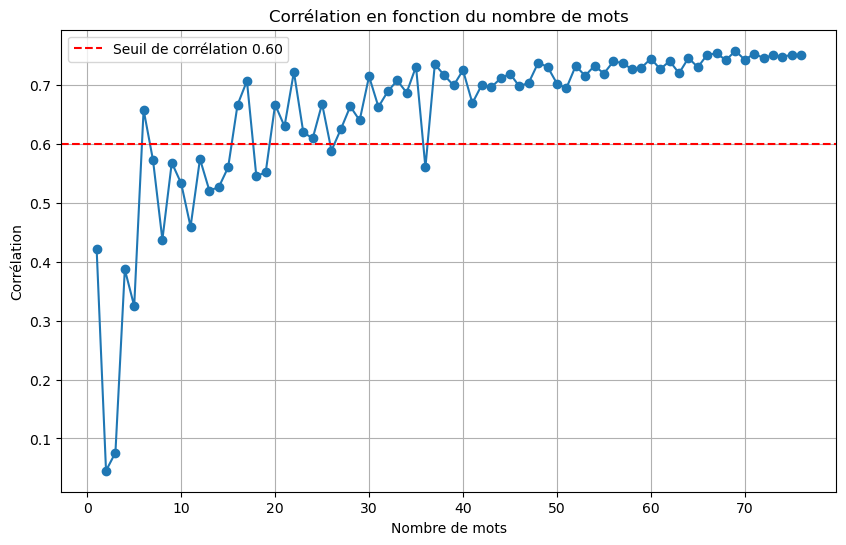

In [276]:
correlations = np.load('matrices/correlations.npy')

nb, corr = zip(*correlations)

plt.figure(figsize=(10, 6))
plt.plot(nb, corr, marker='o')
plt.xlabel("Nombre de mots")
plt.ylabel("Corrélation")
plt.title("Corrélation en fonction du nombre de mots")
plt.grid(True)
plt.axhline(y=0.60, color='r', linestyle='--', label='Seuil de corrélation 0.60')
plt.legend()
plt.show()

<h4 style="padding:16px; color:#FFF; background:#C180BA">Courbes d'ajustement entre les matrices de distances géographiques et linguistiques</h4>

La fonction d'ajustement ici est logarithmique et est de la forme suivante : $$a \cdot \log(1 + x^b)$$

Le `a` permettra à la courbe rouge de s'ajuster efficacement au nuage de points.

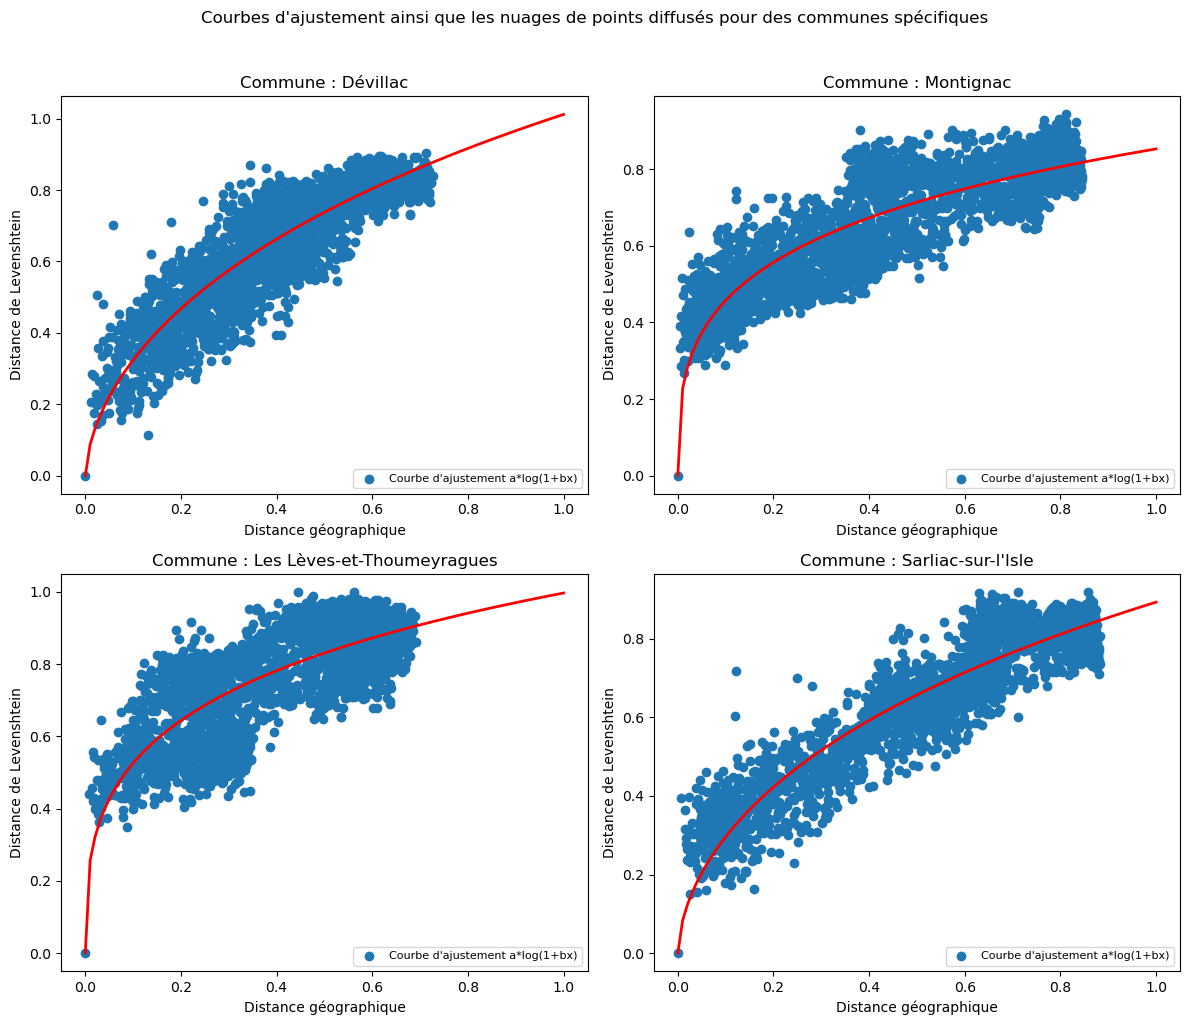

In [222]:
# on normalise les matrices de distances géo. et ling.
dist_geo_norm = MinMaxScaler().fit_transform(dist_geo)
dist_lv_norm = MinMaxScaler().fit_transform(dist_lv)

# espilon est rajouté dans la fonction d'ajustement car il y avait un warning dans le cas où x est très petit
def log_fit(x, a, b, epsilon=1e-10):
    return a * np.log(1 + (x + epsilon)**b)

def plot_courbes(dist_geo, dist_lv, com1, com2, com3, com4, x_max):
    x = np.linspace(0, x_max, 100)
    
    # curve_fit sert à ajuster la courbe de la fonction aux données que composent les deux matrices de distance
    params_1, _ = curve_fit(log_fit, dist_geo[com1], dist_lv[com1], p0=[1, 4]) # p0 = valeurs initiales de a et b
    params_2, _ = curve_fit(log_fit, dist_geo[com2], dist_lv[com2], p0=[1, 5])
    params_3, _ = curve_fit(log_fit, dist_geo[com3], dist_lv[com3], p0=[1, 2])
    params_4, _ = curve_fit(log_fit, dist_geo[com4], dist_lv[com4], p0=[1, 3])
    a_1, b_1 = params_1
    a_2, b_2 = params_2
    a_3, b_3 = params_3
    a_4, b_4 = params_4

    plt.figure(figsize=(12, 10))

    plt.subplot(2, 2, 1)
    plt.scatter(dist_geo[com1], dist_lv[com1])
    plt.plot(x, log_fit(x, a_1, b_1), color='red', linewidth=2)
    plt.xlabel("Distance géographique")
    plt.ylabel("Distance de Levenshtein")
    plt.legend(["Courbe d'ajustement a*log(1+bx)"], loc="lower right", fontsize=8)
    plt.title(f"Commune : {df.iloc[com1]['comuna']}")

    plt.subplot(2, 2, 2)
    plt.scatter(dist_geo[com2], dist_lv[com2])
    plt.plot(x, log_fit(x, a_2, b_2), color='red', linewidth=2)
    plt.xlabel("Distance géographique")
    plt.ylabel("Distance de Levenshtein")
    plt.legend(["Courbe d'ajustement a*log(1+bx)"], loc="lower right", fontsize=8)
    plt.title(f"Commune : {df.iloc[com2]['comuna']}")

    plt.subplot(2, 2, 3)
    plt.scatter(dist_geo[com3], dist_lv[com3])
    plt.plot(x, log_fit(x, a_3, b_3), color='red', linewidth=2)
    plt.xlabel("Distance géographique")
    plt.ylabel("Distance de Levenshtein")
    plt.legend(["Courbe d'ajustement a*log(1+bx)"], loc="lower right", fontsize=8)
    plt.title(f"Commune : {df.iloc[com3]['comuna']}")

    plt.subplot(2, 2, 4)
    plt.scatter(dist_geo[com4], dist_lv[com4])
    plt.plot(x, log_fit(x, a_4, b_4), color='red', linewidth=2)
    plt.xlabel("Distance géographique")
    plt.ylabel("Distance de Levenshtein")
    plt.legend(["Courbe d'ajustement a*log(1+bx)"], loc="lower right", fontsize=8)
    plt.title(f"Commune : {df.iloc[com4]['comuna']}")

    plt.suptitle(f"Courbes d'ajustement ainsi que les nuages de points diffusés pour des communes spécifiques", y=1.02)
    plt.tight_layout()
    plt.show()

plot_courbes(dist_geo_norm, dist_lv_norm, 1100, 2765, 367, 1800, dist_geo_norm.max())

---
<h2 style="padding:16px; color:#FFF; background:#951587">Clustering des distances géographiques</h2>

<h4 style="padding:16px; color:#FFF; background:#C180BA">Méthode du coude</h4>

Tout d'abord, afin de choisir un nombre de clusters pertinent pour l'affichage du dendogramme de la CAH avec la méthode de Ward, on effectue la méthode du coude.

In [223]:
new_dist_geo = squareform(dist_geo) # convertir en une matrice de distance de forme carrée (sinon, warning)
Z_geo = linkage(new_dist_geo, method='ward')

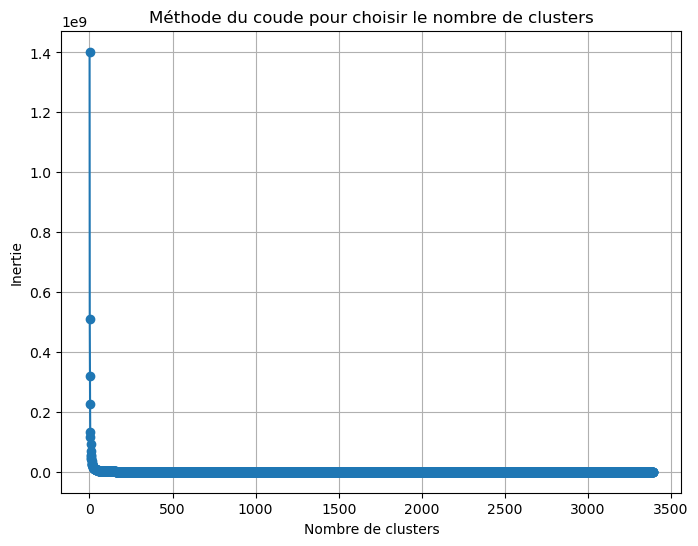

In [224]:
inerties = []
for k in range(1, len(dist_geo) + 1):
    clusters = fcluster(Z_geo, k, criterion='maxclust')
    inertie = 0
    for cluster_id in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster_id)[0]
        cluster_points = dist_geo[np.ix_(cluster_indices, cluster_indices)]
        inertie += np.sum(cluster_points)
    inerties.append(inertie)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(dist_geo) + 1), inerties, marker='o')
plt.title('Méthode du coude pour choisir le nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.grid(True)
plt.show()

D'après la méthode du coude, un nombre pertinent de nombre de clusters est égal à 3 ou 4. Vérifions cela avec le dendogramme de la CAH de Ward.

<h4 style="padding:16px; color:#FFF; background:#C180BA">Dendogramme de Ward</h4>

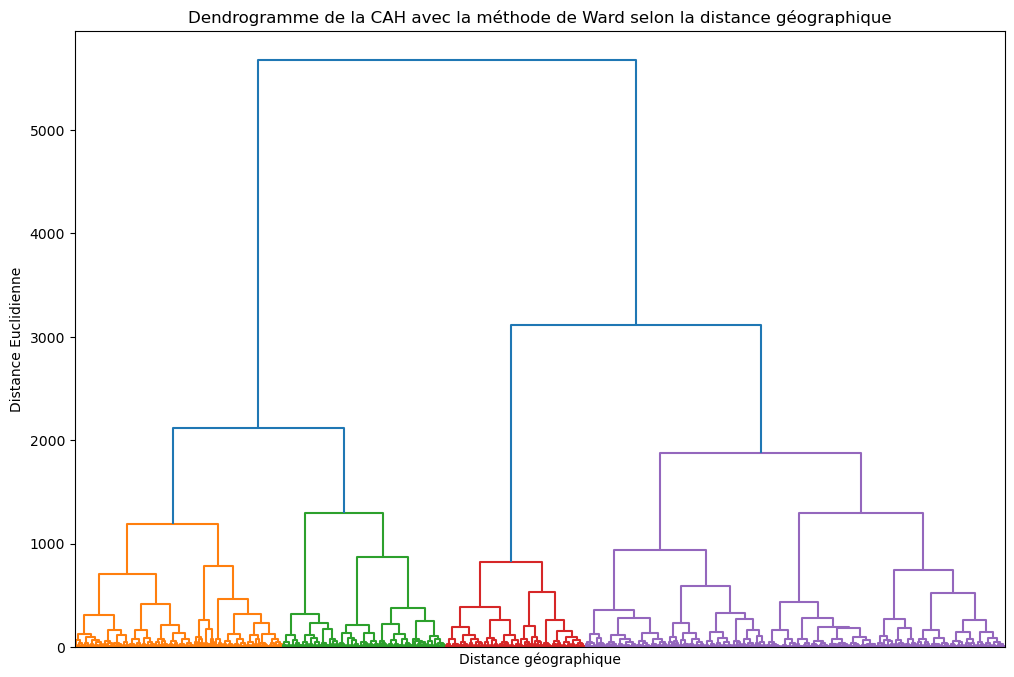

In [225]:
plt.figure(figsize=(12, 8)) 
#dendrogram(Z_geo, no_labels=True, color_threshold=3000) # 3 clusters
dendrogram(Z_geo, no_labels=True, color_threshold=2000) # 4 clusters
plt.title('Dendrogramme de la CAH avec la méthode de Ward selon la distance géographique')
plt.xlabel('Distance géographique')
plt.ylabel('Distance Euclidienne')
plt.show()

In [226]:
#cluster_geo = fcluster(Z_geo, t=3000, criterion='distance') # 3 clusters
cluster_geo = fcluster(Z_geo, t=2000, criterion='distance') # 4 clusters

<h4 style="padding:16px; color:#FFF; background:#C180BA">Carte</h4>

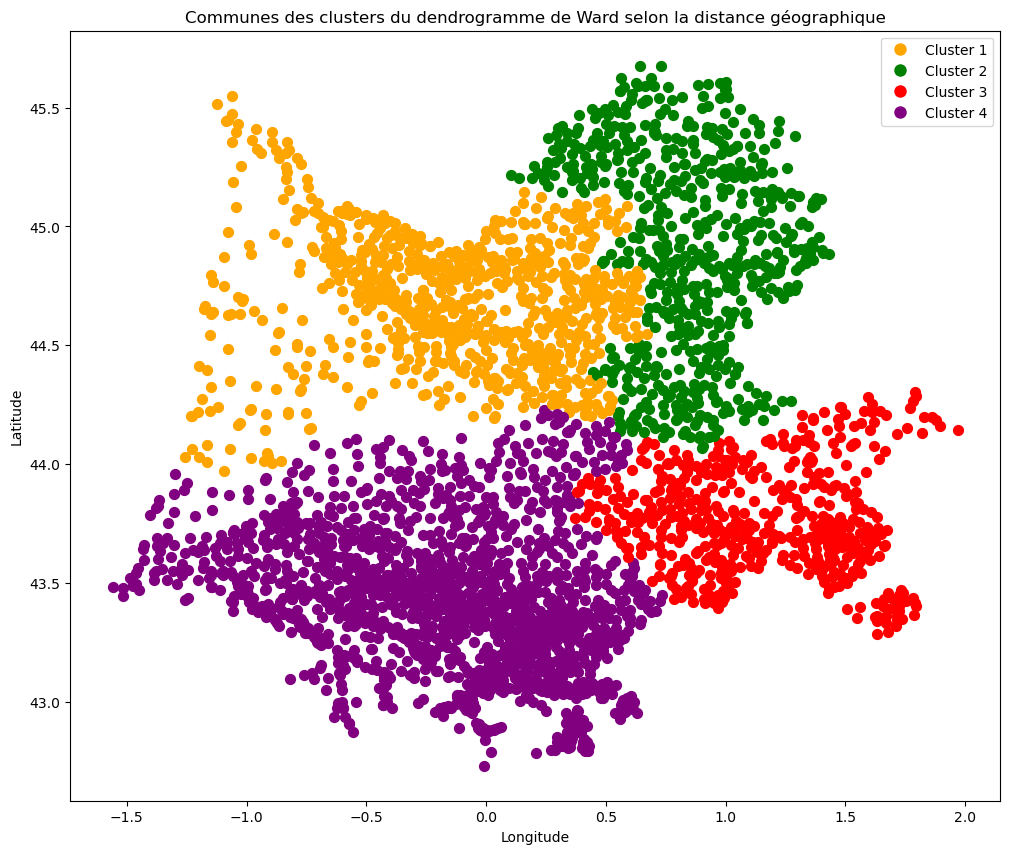

In [227]:
colors = {
    1: 'orange',
    2: 'green',
    3: 'red',
    4: 'purple' # 4 clusters 
}

# relier les points à leur clusters
points_geo = dict(zip(range(len(points)), cluster_geo))

plt.figure(figsize=(12, 10))
for idx, (x, y) in enumerate(points):
    if idx in points_geo:  # vérification si l'indice est présent dans le dictionnaire
        plt.scatter(x, y, color=colors[points_geo[idx]], s=50)

plt.title('Communes des clusters du dendrogramme de Ward selon la distance géographique')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {cluster_geo}') for cluster_geo, color in colors.items()]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()

---
<h2 style="padding:16px; color:#FFF; background:#951587">Clustering des distances linguistiques selon Levenshtein</h2>

---
Tous les mots de la base de données
---

<h4 style="padding:16px; color:#FFF; background:#C180BA">Dendogramme de Ward</h4>

In [228]:
new_dist_lv = squareform(dist_lv)
Z_lv = linkage(new_dist_lv, method='ward')

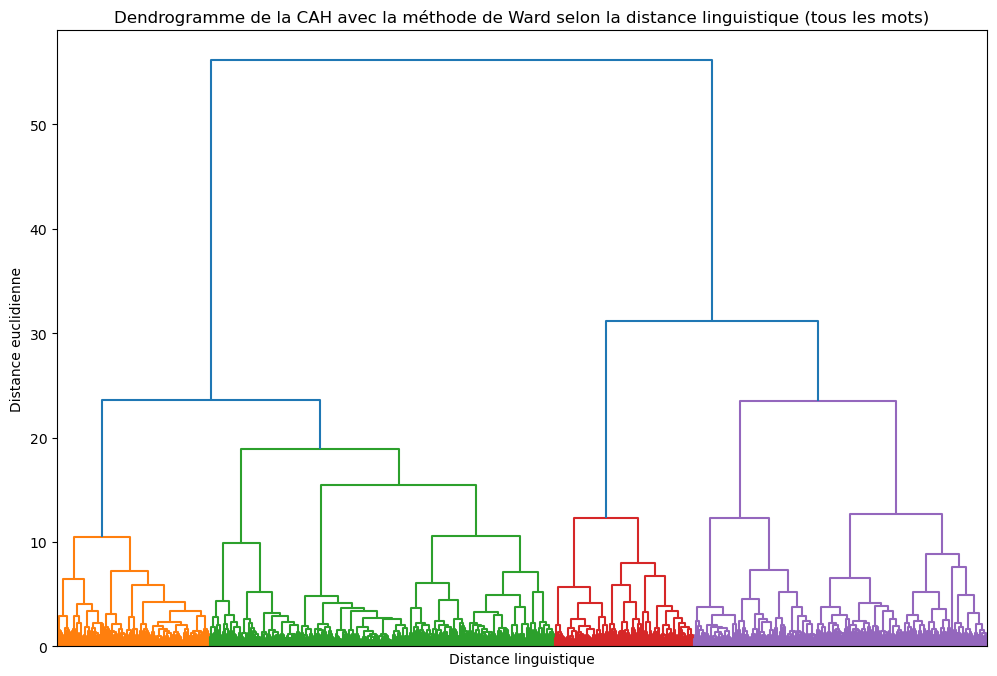

In [229]:
plt.figure(figsize=(12, 8))
#dendrogram(Z_lv, no_labels=True, color_threshold=30) # 3 clusters
dendrogram(Z_lv, no_labels=True, color_threshold=23.5) # 4 clusters
plt.title('Dendrogramme de la CAH avec la méthode de Ward selon la distance linguistique (tous les mots)')
plt.xlabel('Distance linguistique')
plt.ylabel('Distance euclidienne')
plt.show()

In [230]:
#cluster_lv = fcluster(Z_lv, t=30, criterion='distance') # 3 clusters
cluster_lv = fcluster(Z_lv, t=23.5, criterion='distance') # 4 clusters

<h4 style="padding:16px; color:#FFF; background:#C180BA">Carte</h4>

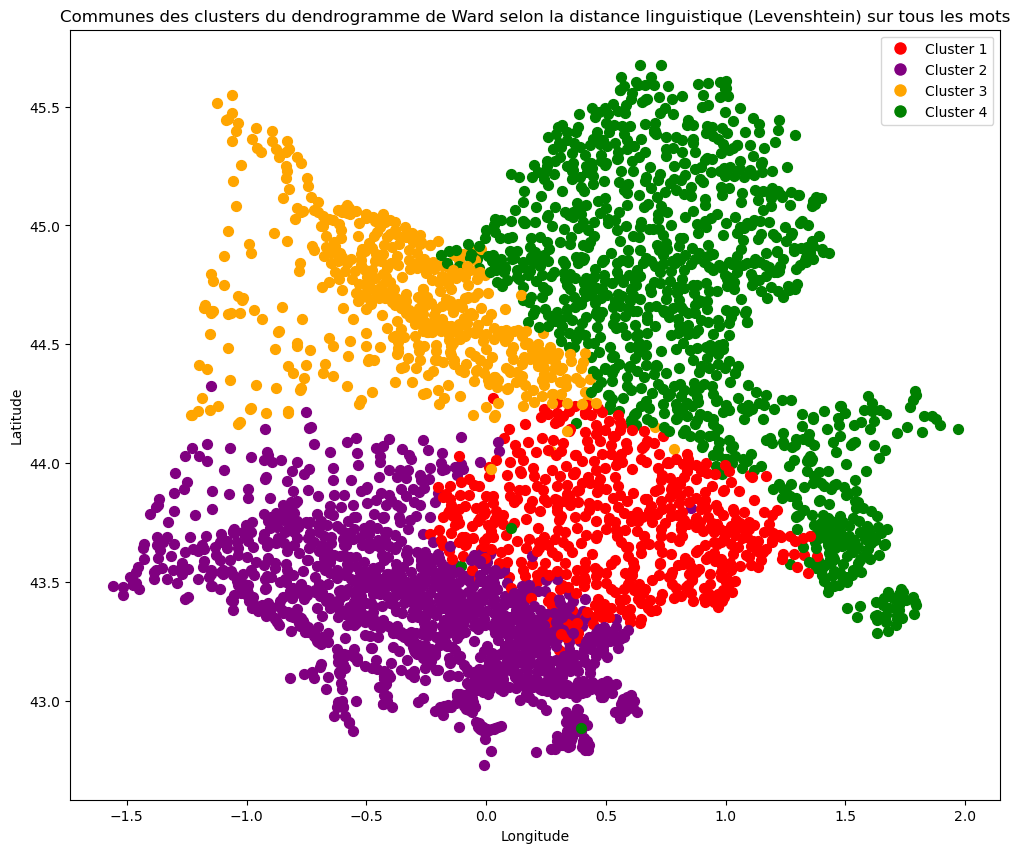

In [231]:
colors = {
    1: 'red',
    2: 'purple',
    3: 'orange',
    4: 'green' # 4 clusters
}

# relier les points à leur clusters
points_lv = dict(zip(range(len(points)), cluster_lv))

plt.figure(figsize=(12, 10))
for idx, (x, y) in enumerate(points):
    if idx in points_lv:  # vérification si l'indice est présent dans le dictionnaire
        plt.scatter(x, y, color=colors[points_lv[idx]], s=50)

plt.title('Communes des clusters du dendrogramme de Ward selon la distance linguistique (Levenshtein) sur tous les mots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {cluster}') for cluster, color in colors.items()]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()

En assignant les couleurs des clusters liés à la répartition de la matrice de distances géographiques, aux clusters liés à la répartition de la matrice de distances linguistiques selon la ressemblance "à vue d'oeil", on retrouve une forte similarité entre ces 2 répartitions géographiques et linguistiques (selon Levenshtein).

---
MOT : "Malheureux"
---

<h4 style="padding:16px; color:#FFF; background:#C180BA">Dendogramme de Ward</h4>

In [232]:
new_dist_lv_malheureux = squareform(dist_lv_malheureux)
Z_lv_malheureux = linkage(new_dist_lv_malheureux, method='ward')

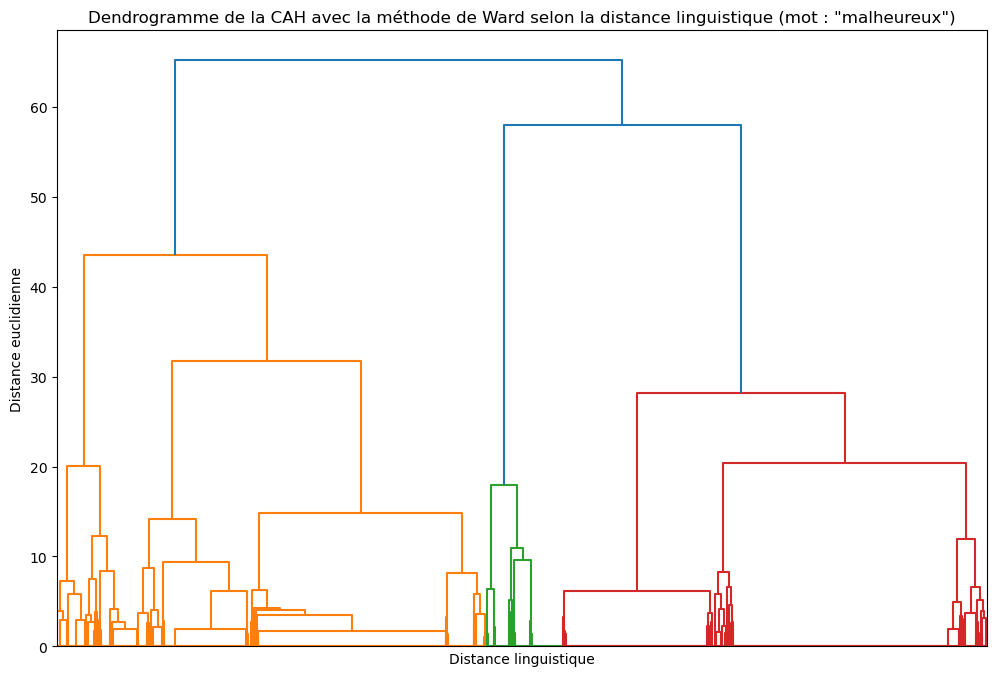

In [233]:
plt.figure(figsize=(12, 8))
dendrogram(Z_lv_malheureux, no_labels=True, color_threshold=50) # 3 clusters
#dendrogram(Z_lv_malheureux, no_labels=True, color_threshold=40) # 4 clusters
plt.title('Dendrogramme de la CAH avec la méthode de Ward selon la distance linguistique (mot : "malheureux")')
plt.xlabel('Distance linguistique')
plt.ylabel('Distance euclidienne')
plt.show()

In [234]:
cluster_lv_malheureux = fcluster(Z_lv_malheureux, t=50, criterion='distance') # 3 clusters
#cluster_lv_malheureux = fcluster(Z_lv_malheureux, t=40, criterion='distance') # 4 clusters

<h4 style="padding:16px; color:#FFF; background:#C180BA">Carte</h4>

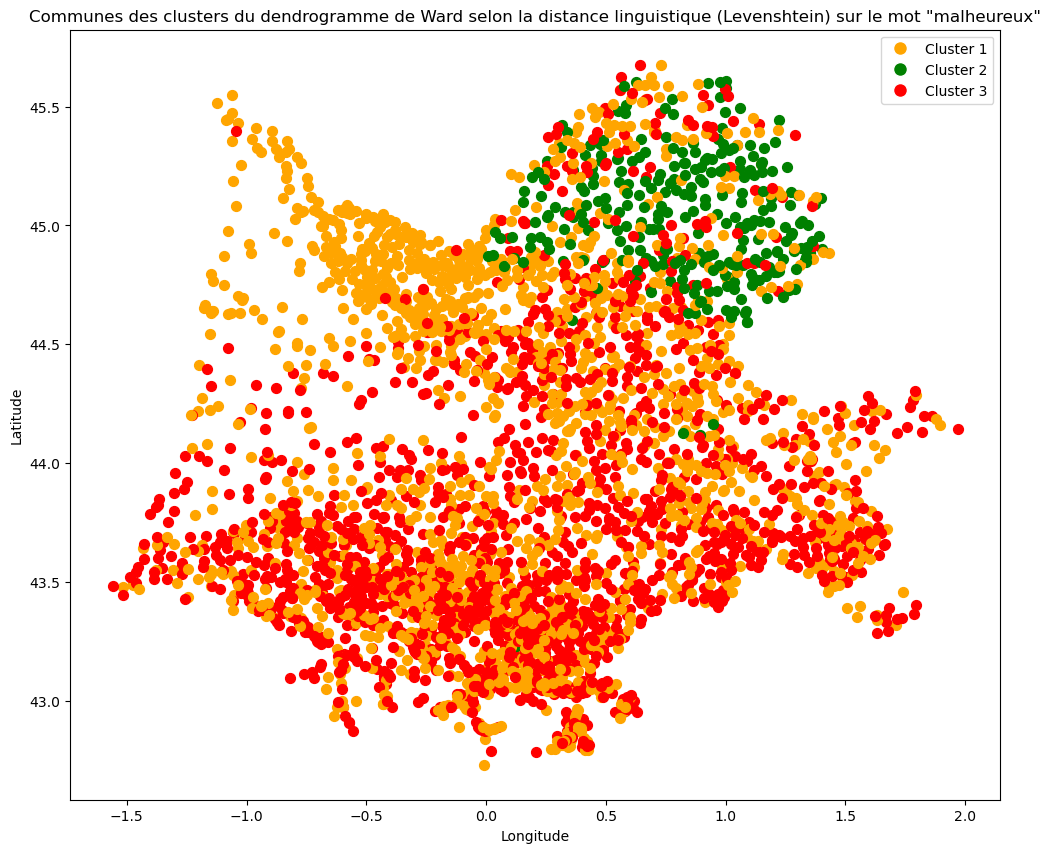

In [235]:
colors = {
    1: 'orange',
    2: 'green',
    3: 'red',
    #4: 'purple' # 4 clusters 
}

# relier les points à leur clusters
points_lv = dict(zip(range(len(points)), cluster_lv_malheureux))

plt.figure(figsize=(12, 10))
for idx, (x, y) in enumerate(points):
    if idx in points_lv:  # vérification si l'indice est présent dans le dictionnaire
        plt.scatter(x, y, color=colors[points_lv[idx]], s=50)

plt.title('Communes des clusters du dendrogramme de Ward selon la distance linguistique (Levenshtein) sur le mot "malheureux"')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {cluster}') for cluster, color in colors.items()]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()

---
MOT : "Être"
---

<h4 style="padding:16px; color:#FFF; background:#C180BA">Dendogramme de Ward</h4>

In [236]:
new_dist_lv_etre = squareform(dist_lv_etre)
Z_lv_etre = linkage(new_dist_lv_etre, method='ward')

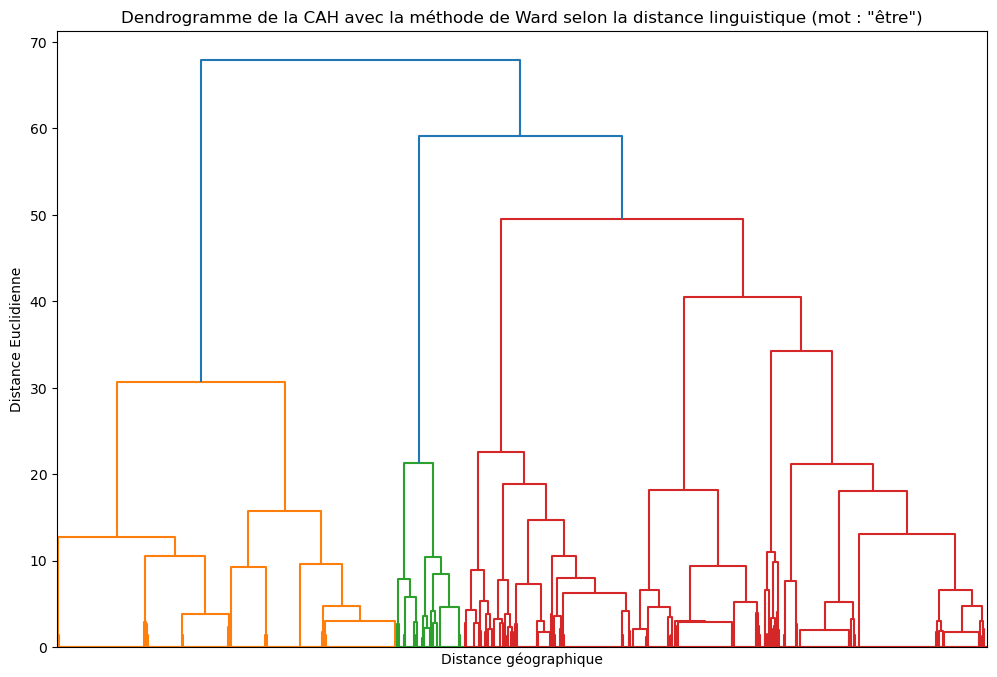

In [237]:
plt.figure(figsize=(12, 8))
dendrogram(Z_lv_etre, no_labels=True, color_threshold=50) # 3 clusters
#dendrogram(Z_lv_etre, no_labels=True, color_threshold=45) # 4 clusters
plt.title('Dendrogramme de la CAH avec la méthode de Ward selon la distance linguistique (mot : "être")')
plt.xlabel('Distance géographique')
plt.ylabel('Distance Euclidienne')
plt.show()

In [238]:
cluster_lv_etre = fcluster(Z_lv_etre, t=50, criterion='distance') # 3 clusters
#cluster_lv_etre = fcluster(Z_lv_etre, t=45, criterion='distance') # 4 clusters

<h4 style="padding:16px; color:#FFF; background:#C180BA">Carte</h4>

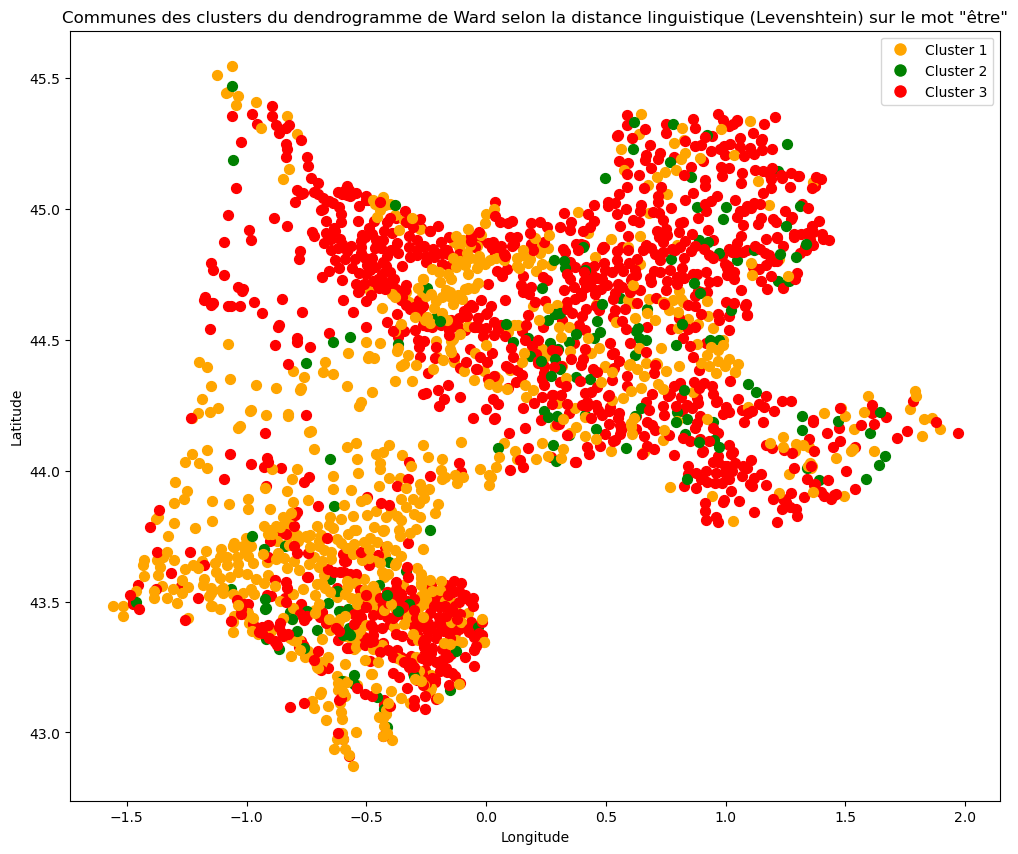

In [239]:
colors = {
    1: 'orange',
    2: 'green',
    3: 'red',
    #4: 'purple' # 4 clusters 
}

# relier les points à leur clusters
points_lv = dict(zip(range(len(points)), cluster_lv_etre))

plt.figure(figsize=(12, 10))
for idx, (x, y) in enumerate(points):
    if idx in points_lv:  # vérification si l'indice est présent dans le dictionnaire
        plt.scatter(x, y, color=colors[points_lv[idx]], s=50)

plt.title('Communes des clusters du dendrogramme de Ward selon la distance linguistique (Levenshtein) sur le mot "être"')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {cluster}') for cluster, color in colors.items()]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()

---
<h2 style="padding:16px; color:#FFF; background:#951587">INSEE Population 1896</h2>

<h4 style="padding:16px; color:#FFF; background:#C180BA">Téléchargement des données</h4>

---
Population par commune
---

In [240]:
# on (re-)télécharge les données utiles
df = pd.read_csv('bd3_Bourciez.csv', sep=';')
pop1896_com = pd.read_excel('datas/base-pop-historiques-1876-2021.xlsx', sheet_name=0) 

# on garde que les données utiles à partir de la ligne de données
row = pop1896_com[pop1896_com.iloc[:, 0].astype(str).str.contains("CODGEO")].index[0]
pop1896_com = pop1896_com.iloc[row:].reset_index(drop=True)
pop1896_com.columns = pop1896_com.iloc[0] # on redéfinit les colonnes

# on supprime les lignes qui nous sont inutiles
pop1896_com = pop1896_com.drop(0).reset_index(drop=True) 

# ne pas prendre les lignes où la colonne DEP vaut 971, 972, 973 ou 974 (en dehors de la france métropolitaine)
pop1896_com = pop1896_com[~pop1896_com['DEP'].isin(['971', '972', '973', '974'])]

# on garde les 2 colonnes que nous voulons seulement et on les renomme ensuite
pop1896_com = pop1896_com[["LIBGEO", "PTOT1896"]]
pop1896_com = pop1896_com.rename(columns={
    "LIBGEO": "Commune",
    "PTOT1896": "Population"
})

pop1896_com

0                      Commune Population
0      L'Abergement-Clémenciat        572
1        L'Abergement-de-Varey        391
2            Ambérieu-en-Bugey       3548
3          Ambérieux-en-Dombes        852
4                      Ambléon        206
...                        ...        ...
34830       Villers-en-Arthies        474
34831            Villiers-Adam        462
34832          Villiers-le-Bel       1644
34833          Villiers-le-Sec        248
34834      Wy-dit-Joli-Village        280

[34835 rows x 2 columns]

Nous allons maintenant associer le nombre de population des communes de "pop1896_com" aux communes de "df".

In [241]:
def filter_commune(name):
    """Suppression des tirets et accents possibles dans les noms de ville, avec l'ajout de la majuscule."""
    return unidecode.unidecode(name).upper().replace('-', '').replace(' ', '')

# application du filtre sur les noms de communes des deux dataframes
df['comuna_bis'] = df['comuna'].apply(filter_commune)
pop1896_com['Commune_bis'] = pop1896_com['Commune'].apply(filter_commune)

# vérification des communes en commun
communes = df['comuna_bis'].unique()
pop1896_com_bis = pop1896_com[pop1896_com['Commune_bis'].isin(communes)]

# ajout des informations de population
pop = pop1896_com_bis.set_index('Commune_bis')['Population'].to_dict()
df['population'] = df['comuna_bis'].map(pop)

df

departament                               canton  \
0           Gironde                     Canton d'Audenge   
1           Gironde                     Canton d'Audenge   
2           Gironde                     Canton d'Audenge   
3           Gironde                     Canton d'Audenge   
4           Gironde                     Canton d'Audenge   
...             ...                                  ...   
3387  Haute-Garonne  Canton de Villefranche-de-Lauragais   
3388  Haute-Garonne  Canton de Villefranche-de-Lauragais   
3389  Haute-Garonne  Canton de Villefranche-de-Lauragais   
3390  Haute-Garonne  Canton de Villefranche-de-Lauragais   
3391  Haute-Garonne  Canton de Villefranche-de-Lauragais   

                             comuna         x          y  \
0                Andernos-les-Bains -1.092518  44.747690   
1                              Arès -1.137993  44.767644   
2                       Audenge-bis -1.015499  44.694984   
3                           Audenge -1.019857  44.688365   
4                           Biganos -0.969627  44.644091   
...                             ...       ...        ...   
3387                       Vallègue  1.755420  43.424481   
3388                   Vieillevigne  1.657721  43.402115   
3389  Villefranche-de-Lauragais-bis  1.722565  43.403773   
3390      Villefranche-de-Lauragais  1.715107  43.400466   
3391                  Villenouvelle  1.661930  43.435200   

                                   T31 T31 que enonciatiu  \
0            alors estet hort malherus                  ø   
1            alors estut hort malhurus                  ø   
2            alors ēstét hort maleurus                  ø   
3           alors êstut hort malheurus                  ø   
4           labéts estét hort malherus                  ø   
...                                ...                ...   
3387  alabéts él fousquéc pla malérous                  ø   
3388    alabets fousquec pla malhérous                  ø   
3389      alabéx fousquèt pla malérous                  ø   
3390      alabéx fousquèt pla malurous                  ø   
3391      alabéx fousquèc pla malérous                  ø   

     (m) T31 que enonciatiu illa hōra (m) illa hōra  ...   dōnābat  \
0            part. enonc.       alors          adv.  ...       NaN   
1            part. enonc.       alors          adv.  ...  dounaiou   
2            part. enonc.       alors          adv.  ...       NaN   
3            part. enonc.       alors          adv.  ...       NaN   
4            part. enonc.         NaN          adv.  ...       NaN   
...                     ...       ...           ...  ...       ...   
3387           part. enonc.       NaN          adv.  ...    dounao   
3388           part. enonc.       NaN          adv.  ...    dounao   
3389           part. enonc.       NaN          adv.  ...     douna   
3390           part. enonc.       NaN          adv.  ...   dounabo   
3391           part. enonc.       NaN          adv.  ...    dounao   

            (m) dōnābat dăre           (m) dăre  pas (m) pas res.1  \
0     v. 3ps. imp. ind.  NaN  v. 3ps. imp. ind.  NaN   part.  arrè   
1     v. 3ps. imp. ind.  NaN  v. 3ps. imp. ind.  NaN   part.   rei   
2     v. 3ps. imp. ind.  NaN  v. 3ps. imp. ind.  NaN   part.  arré   
3     v. 3ps. imp. ind.  NaN  v. 3ps. imp. ind.  NaN   part.  arré   
4     v. 3ps. imp. ind.  NaN  v. 3ps. imp. ind.  pas   part.    ré   
...                 ...  ...                ...  ...     ...   ...   
3387  v. 3ps. imp. ind.  NaN  v. 3ps. imp. ind.  pas   part.   rés   
3388  v. 3ps. imp. ind.  NaN  v. 3ps. imp. ind.  pas   part.   rés   
3389  v. 3ps. imp. ind.  NaN  v. 3ps. imp. ind.   pa   part.   rés   
3390  v. 3ps. imp. ind.  NaN  v. 3ps. imp. ind.  NaN   part.    ré   
3391  v. 3ps. imp. ind.  NaN  v. 3ps. imp. ind.  pas   part.   rés   

       (m) res.1                  comuna_bis population  
0     pron. ind.            ANDERNOSLESBAINS     1118.0  
1     pron. ind.                   

In [242]:
missing_population_count = df['population'].isna().sum()
print(f"Nombre de valeurs manquantes dans la colonne population : {missing_population_count}")

Nombre de valeurs manquantes dans la colonne population : 516


Pour gérer le cas des données manquantes au niveau de la population, nous allons dans un premier temps associer le même nombre de population d'une commune se terminant par "bis", qu'une commune ayant le même nom sans "bis".

In [243]:
# gestion des noms de communes se terminant par "BIS"
def com_population(name, pop):
    base_name = None
    if name.endswith("BIS"):
        base_name = name[:-3]
    if base_name in pop:
        return pop[base_name]
    return np.nan

for i, row in df[df['population'].isna()].iterrows():
    population = com_population(row['comuna_bis'], pop)
    df.at[i, 'population'] = population

In [244]:
missing_population_count = df['population'].isna().sum()
print(f"Nombre de valeurs manquantes dans la colonne population : {missing_population_count}")

Nombre de valeurs manquantes dans la colonne population : 338


Le nombre de valeurs manquantes ayant diminué de 516 données à 338, nous allons mettre le même nombre de population dans une commune que le nombre dans la commune la plus proche géographiquement grâce au triangle de Delaunay.

Explication de la fonction *com_voisine* :
 
* Grâce aux indices que fournit **triangle.vertex_neighbor_vertices[0]**, on parcourt tous les indices des sommets voisins selon l'index d'indice fournit en paramètres. On stocke ces voisins grâce à la liste de voisins que fournit **triangle.vertex_neighbor_vertices[1]**, dans **neighbors**".

* On parcourt ensuite chaque voisin et on stockera le nombre de population, s'il n'est pas null, afin de remplir nos données manquantes. Sinon, on ajoute à **neighbors** les nouveaux voisins à explorer **new_neighbors**, qui sont les voisins des voisins, récursivement.

* On renvoie **null** dans le cas où un voisin n'a pas été trouvé par convention, même si cela n'arrivera pas car chaque point sur la carte est relié (donc c'est connexe) et s'il y a au moins une commune qui a le nombre de population renseigné.

In [245]:
def com_voisine(index, triangle, df):
    """Recherche de la commune voisine à l'aide du triangle de Delaunay."""
    neighbors = list(triangle.vertex_neighbor_vertices[1][triangle.vertex_neighbor_vertices[0][index]:triangle.vertex_neighbor_vertices[0][index + 1]])
    while neighbors:
        # on prend l'indice du 1er voisin avec ".pop(0)", et on le supprime de la liste "neighbors", ayant été déjà visité
        neighbor = neighbors.pop(0) 
        if not np.isnan(df.iloc[neighbor]['population']):
            return df.iloc[neighbor]['population']
        new_neighbors = triangle.vertex_neighbor_vertices[1][triangle.vertex_neighbor_vertices[0][neighbor]:triangle.vertex_neighbor_vertices[0][neighbor + 1]]
        neighbors.extend(new_neighbors)
    return np.nan

for i, row in df[df['population'].isna()].iterrows():
    nearest_population = com_voisine(i, triangle, df)
    df.at[i, 'population'] = nearest_population

In [246]:
missing_population_count = df['population'].isna().sum()
print(f"Nombre de valeurs manquantes dans la colonne population : {missing_population_count}")

Nombre de valeurs manquantes dans la colonne population : 0


Désormais, toute population de commune est renseignée. Nous pouvons ajouter cette information sous un nouveau fichier "bd3_Bourciez_new.csv" de l'enquête Bourciez.

In [247]:
df['population'] = df['population'].fillna(0).astype(int) # on s'assure que la population est un entier 
df_new = pd.read_csv('bd3_Bourciez.csv', sep=';') # on télécharge un nouveau dataframe
df_new.insert(5, 'population', df['population']) # on lui insère à la 5ème position la colonne de la population
df_new.to_csv('bd3_Bourciez_new.csv', sep=';', index=False) # on télécharge ce dataframe en csv

---
Population par département
---

In [248]:
pop1896_dep = pd.read_excel('datas/REC_T68.xls', sheet_name=0) 

# on garde que les données utiles à partir de la ligne de données
row = pop1896_dep[pop1896_dep.iloc[:, 0].astype(str).str.contains("Nom de l'unité d'analyse")].index[0]
pop1896_dep = pop1896_dep.iloc[row:].reset_index(drop=True)
pop1896_dep.columns = pop1896_dep.iloc[0] # on redéfinit les colonnes

# on supprime les lignes qui nous sont inutiles
pop1896_dep = pop1896_dep.drop(0).reset_index(drop=True) 
pop1896_dep = pop1896_dep.drop(0).reset_index(drop=True) 

# on garde les 2 colonnes que nous voulons seulement et on les renomme ensuite
pop1896_dep = pop1896_dep[["Nom de l'unité d'analyse", "Population totale au 29 mars 1896"]]
pop1896_dep = pop1896_dep.rename(columns={
    "Nom de l'unité d'analyse": "Département",
    "Population totale au 29 mars 1896": "Population"
})

pop1896_dep

0      Département Population
0              AIN     351569
1            AISNE     541613
2           ALLIER     424378
3   ALPES(BASSES-)     118142
4   ALPES(HAUTES-)     113229
..             ...        ...
82          VIENNE     338114
83  VIENNE(HAUTE-)     375724
84          VOSGES     421412
85           YONNE     332656
86         BELFORT      88047

[87 rows x 2 columns]

<h4 style="padding:16px; color:#FFF; background:#C180BA">Clustering sur la population par commune</h4>

**Matrices sur la population**

In [249]:
dist_popu1 = np.array([df['population'][i] * df['population'] for i in range(len(points))])
med1 = np.median(dist_popu1)
dist_popu2 = dist_popu1/med1
dist_popu3 = np.array([np.absolute(df['population'][i] - df['population']) for i in range(len(points))])

**Corrélations**

In [250]:
corr, _ = pearsonr(dist_popu1.flatten(), dist_lv.flatten())
print(f"Corrélation entre dist_popu1 et dist_lv : {corr}.")

Corrélation entre dist_popu1 et dist_lv : -0.00457364098809292.


In [251]:
corr, _ = pearsonr(dist_geo.flatten()/dist_popu1.flatten(), dist_lv.flatten())
print(f"Corrélation entre dist_geo/dist_popu1 et dist_lv : {corr}.")

Corrélation entre dist_geo/dist_popu1 et dist_lv : 0.23498356949527727.


**Modèles de régression**

In [252]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
reg = model.fit(dist_geo, dist_lv)
R2_geo_lv = reg.score(dist_geo, dist_lv)
print(f"Le R^2 entre la matrice de distances géographiques et de distances linguistiques (Levenshtein) est de {R2_geo_lv}.")

Le R^2 entre la matrice de distances géographiques et de distances linguistiques (Levenshtein) est de 0.999927230852312.


**CAH de WARD**

In [253]:
Z_popu1 = linkage(dist_popu1, method='complete')

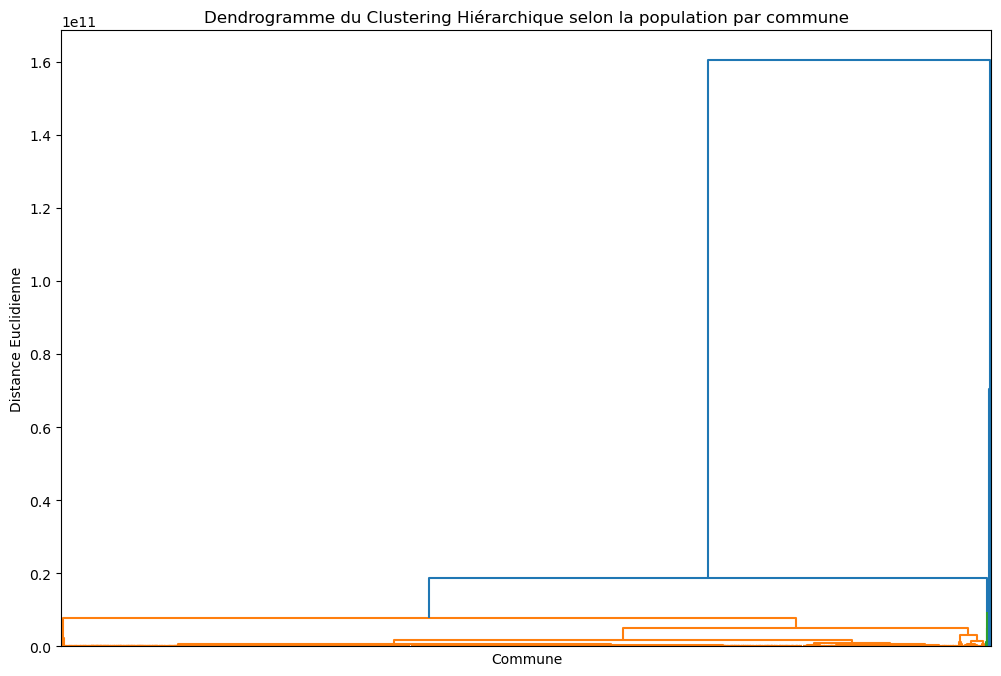

In [254]:
plt.figure(figsize=(12, 8))
# découpage à la hauteur t = 100000 : 3 clusters obtenus dont 2 "solos" (mais pas très lisible)
dendrogram(Z_popu1, no_labels=True, color_threshold=15000000000)
plt.title('Dendrogramme du Clustering Hiérarchique selon la population par commune')
plt.xlabel('Commune')
plt.ylabel('Distance Euclidienne')
plt.show()

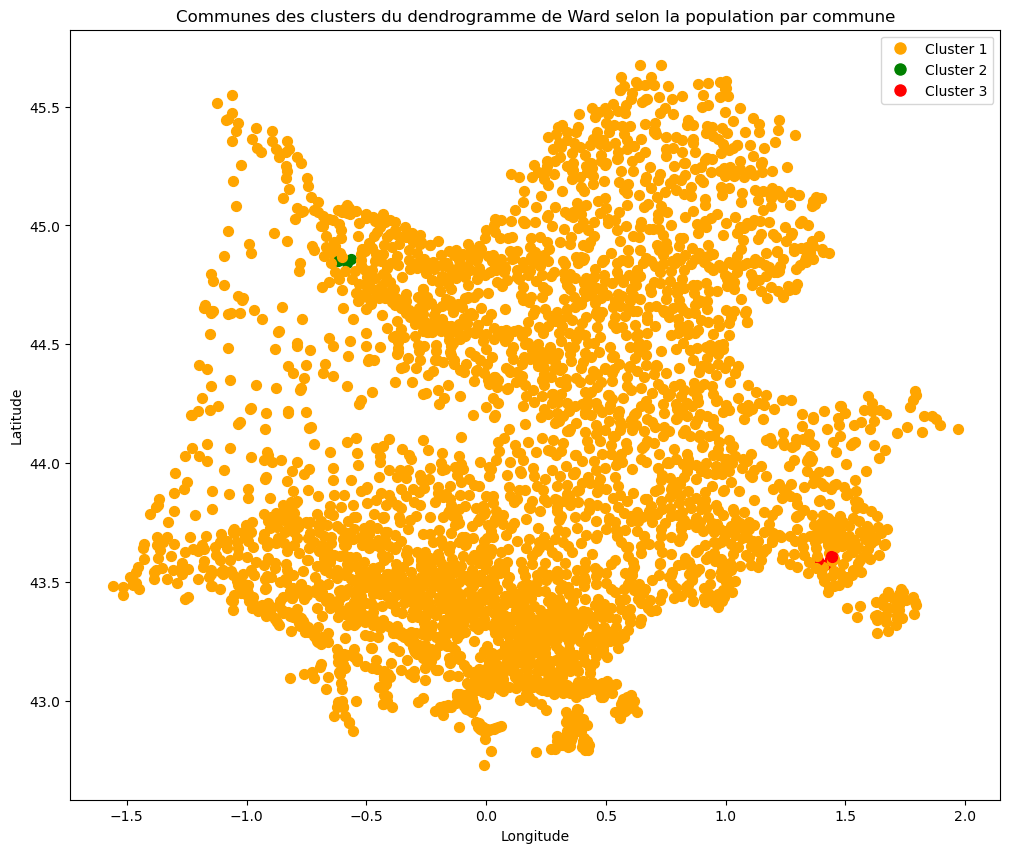

In [255]:
cluster_popu1 = fcluster(Z_popu1, t=30000000000, criterion='distance')

colors = {
    1: 'orange',
    2: 'green',
    3: 'red'
}

# relier les points à leur clusters
points_popu1 = dict(zip(range(len(points)), cluster_popu1))

plt.figure(figsize=(12, 10))
for idx, (x, y) in enumerate(points):
    if idx in points_popu1:  # vérification si l'indice est présent dans le dictionnaire
        plt.scatter(x, y, color=colors[points_popu1[idx]], s=50)

plt.title('Communes des clusters du dendrogramme de Ward selon la population par commune')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {cluster}') for cluster, color in colors.items()]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()

In [256]:
Z_popu2 = linkage(dist_popu2, method='ward')

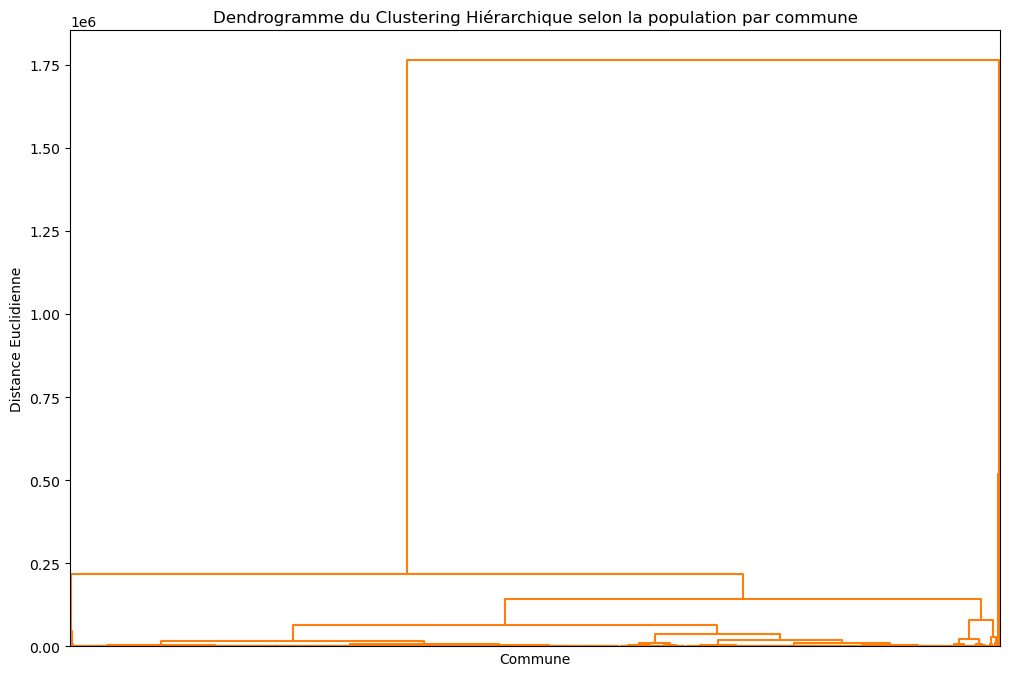

In [257]:
plt.figure(figsize=(12, 8))
# découpage à la hauteur t = 100000 : 3 clusters obtenus dont 2 "solos" (mais pas très lisible)
dendrogram(Z_popu2, no_labels=True, color_threshold=30000000000)
plt.title('Dendrogramme du Clustering Hiérarchique selon la population par commune')
plt.xlabel('Commune')
plt.ylabel('Distance Euclidienne')
plt.show()

In [258]:
Z_popu3 = linkage(squareform(dist_popu3), method='ward')

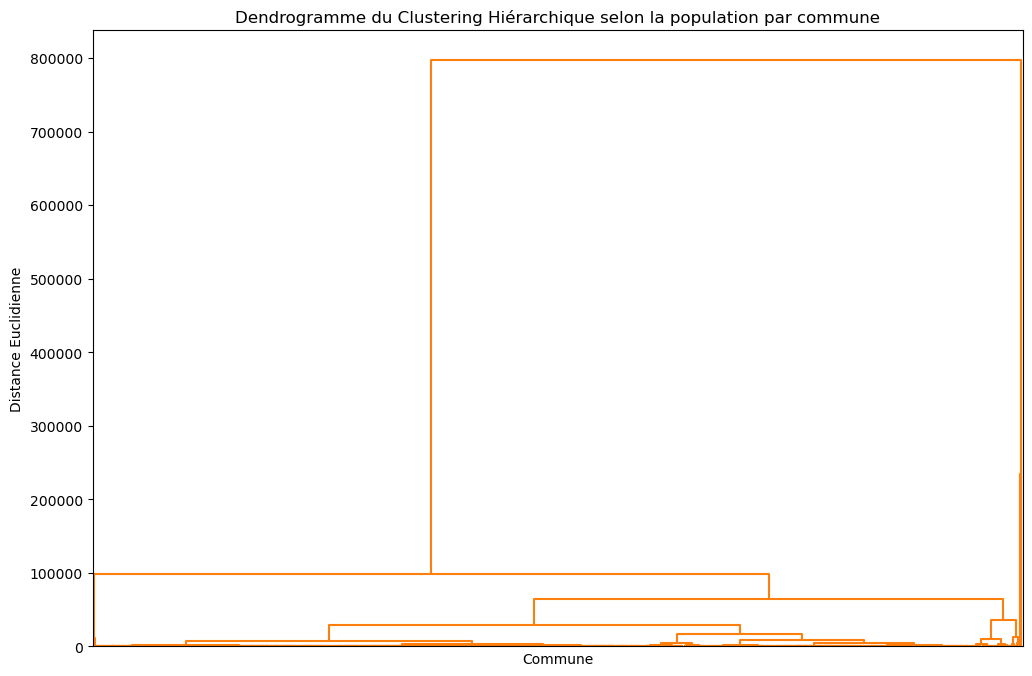

In [259]:
plt.figure(figsize=(12, 8))
dendrogram(Z_popu3, no_labels=True, color_threshold=30000000000)
plt.title('Dendrogramme du Clustering Hiérarchique selon la population par commune')
plt.xlabel('Commune')
plt.ylabel('Distance Euclidienne')
plt.show()

**CAH de WARD sur la population par département**

In [260]:
Z_dep = linkage(pop1896_dep[['Population']], method='ward')

In [261]:
dep = np.array(pop1896_dep['Département'])

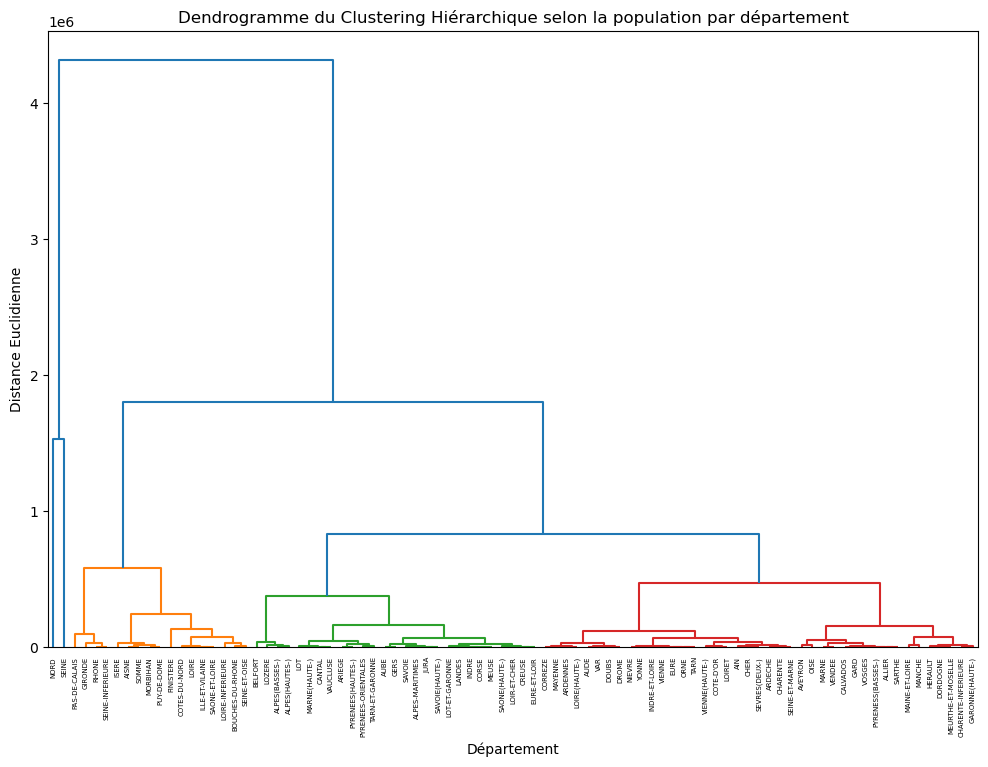

In [262]:
plt.figure(figsize=(12, 8))
# découpage à la hauteur t = 700000 : 5 groupes obtenus dont 2 "solos"
dendrogram(Z_dep, labels=dep, color_threshold=700000)
plt.title('Dendrogramme du Clustering Hiérarchique selon la population par département')
plt.xlabel('Département')
plt.ylabel('Distance Euclidienne')
plt.show()